In [99]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



In [100]:
df = pd.read_csv('tips.csv')  
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [102]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [103]:
df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no null values in the dataset

In [104]:
categorical_features = ['sex', 'smoker', 'day', 'time']  
for col in categorical_features:
  df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Setting the type of categorical columns to 'category' will reduce the memory usage of the dataset

In [105]:
df_copy = df.copy()
#To use the orignal df for later use

In [106]:
df = pd.get_dummies(df, drop_first=True)

In [107]:
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [108]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['total_bill', 'size'] 

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.314711,1.01,-0.600193,False,False,False,True,False,False
1,-1.063235,1.66,0.453383,True,False,False,True,False,False
2,0.137780,3.50,0.453383,True,False,False,True,False,False
3,0.438315,3.31,-0.600193,True,False,False,True,False,False
4,0.540745,3.61,1.506958,False,False,False,True,False,False


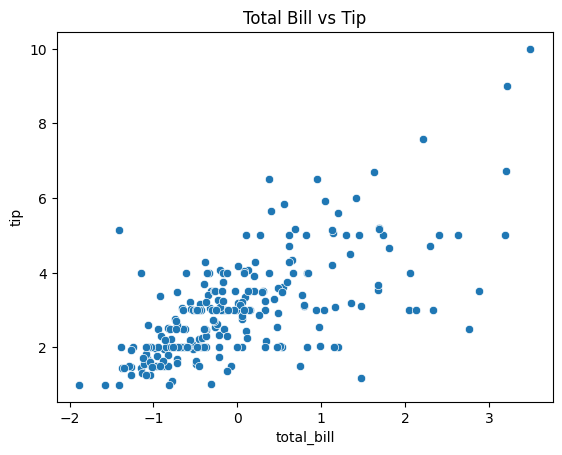

In [109]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.show()

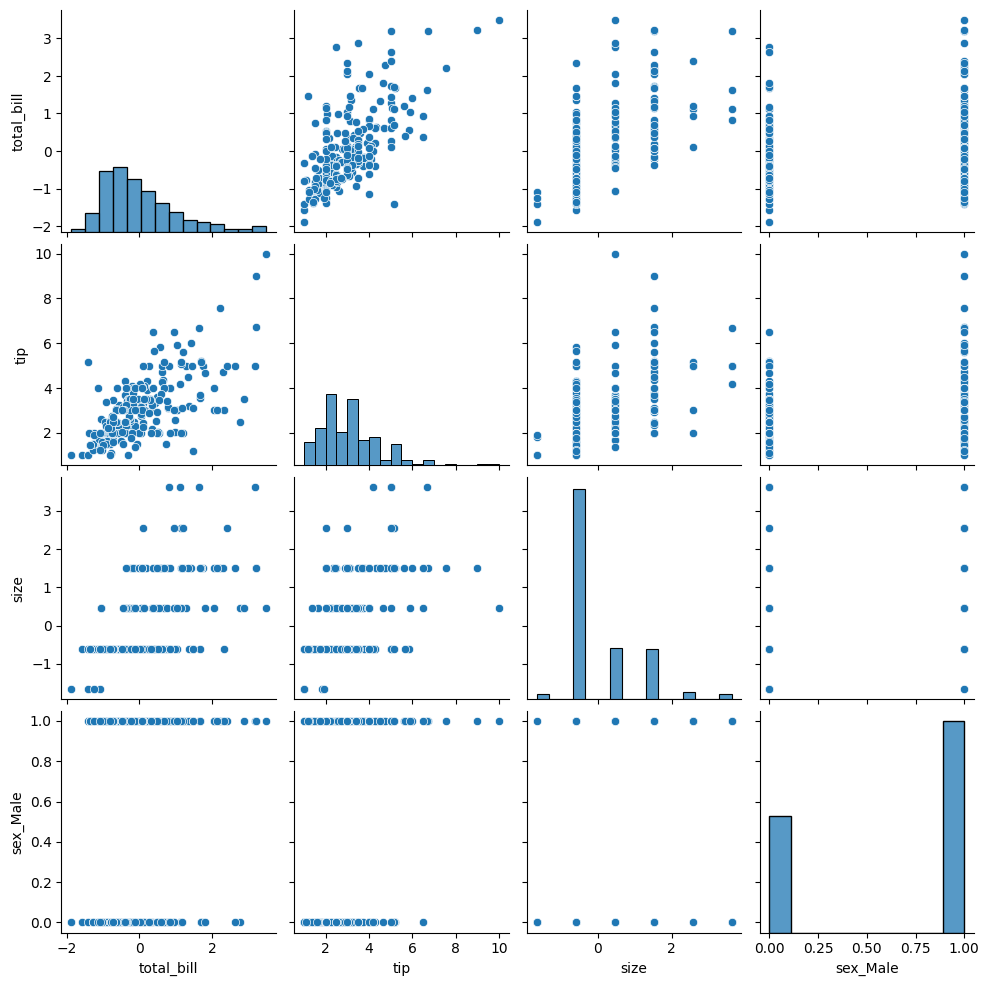

In [110]:
sns.pairplot(df[['total_bill', 'tip', 'size', 'sex_Male']])
plt.show()

From the pairplot, we can see that the not all of the features are linearly correlated with the target variable. This means that we may need to use non-linear models to predict the target variable.

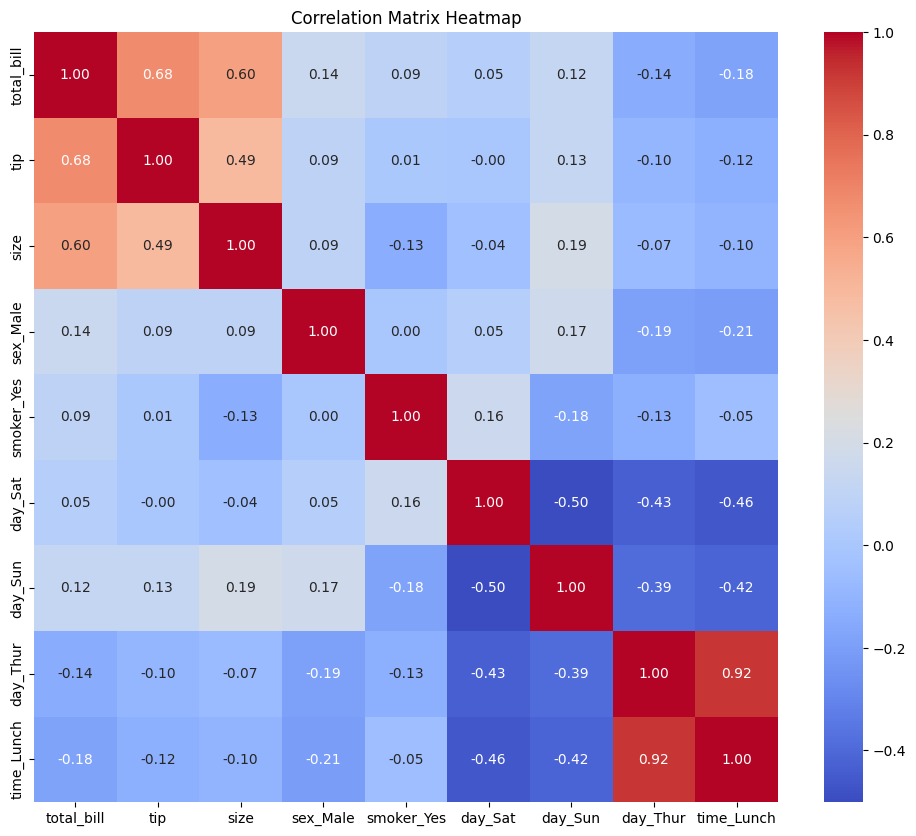

In [111]:
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import linear_rainbow

X = df.drop('tip', axis=1).select_dtypes(include=[np.number])
y = df['tip']

model = OLS(y, X).fit()

rainbow_test = linear_rainbow(model)
print(f"Rainbow Test statistic: {rainbow_test[0]}, p-value: {rainbow_test[1]}")

Rainbow Test statistic: 1.0137844886716965, p-value: 0.4702522805248699


Rainbow test statistic being close to 1 indicates that the model is correctly specified and p-value being greater than 0.05 indicates that the model is not misspecified.

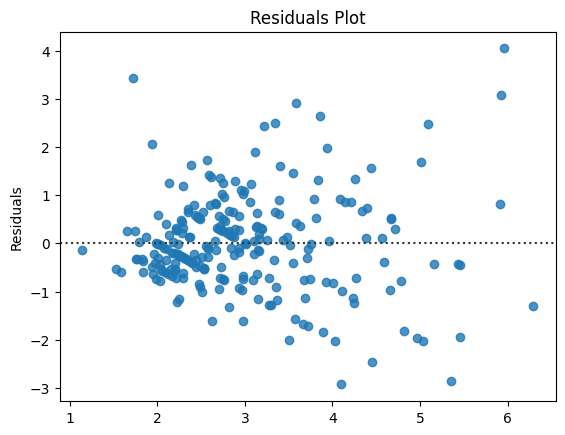

In [113]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
residuals = y - predictions

sns.residplot(x=predictions, y=residuals)
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

The residuals seem somewhat randomly distributed, but there is a concentration near certain predicted values, which could indicate some clustering or structure in the data

 few points lie farther from the zero line, which could indicate potential outliers.

Unique days: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']


C:\Users\Cherish\AppData\Local\Temp\ipykernel_23136\265326012.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_per_day = df_copy.groupby('day')['tip'].mean().reindex(day_order)


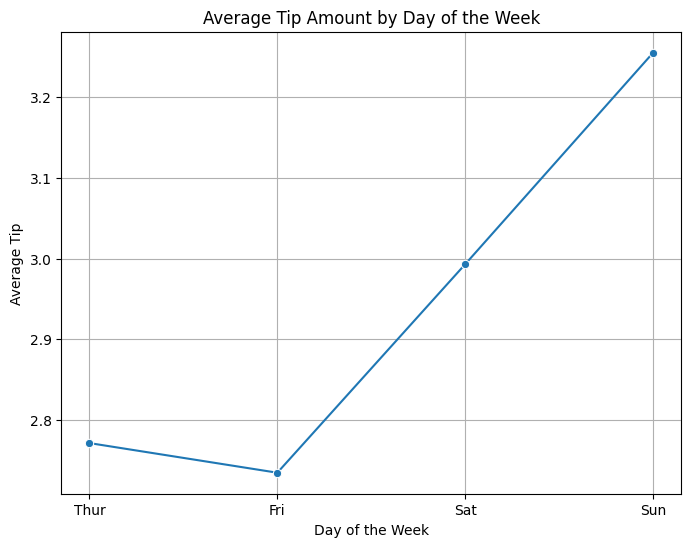

In [114]:
print("Unique days:", df_copy['day'].unique())

day_order = ['Thur', 'Fri', 'Sat', 'Sun']  

avg_tip_per_day = df_copy.groupby('day')['tip'].mean().reindex(day_order)

plt.figure(figsize=(8,6))
sns.lineplot(x=avg_tip_per_day.index, y=avg_tip_per_day.values, marker='o', linestyle='-')
plt.title('Average Tip Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip')
plt.grid(True)
plt.show()

In [115]:
df['total_bill_x_size'] = df['total_bill'] * df['size']

In [116]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

df = pd.concat([df, df_poly], axis=1)

In [117]:
X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')


Training set: (195, 14), Testing set: (49, 14)


In [118]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

Linear Regression - MSE: 0.8201294220071953, R2: 0.3438814216751471


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')

Ridge Regression - MSE: 0.8197358165112854, R2: 0.3441963132903818


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')

Lasso Regression - MSE: 0.6839571966830722, R2: 0.4528216992575935


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression - MSE: {mse_dt}, R2: {r2_dt}')

Decision Tree Regression - MSE: 0.9997489795918368, R2: 0.2001824814842902


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest Regression - MSE: 0.832070244693879, R2: 0.33432854453772953


In [ ]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Support Vector Regression - MSE: {mse_svr}, R2: {r2_svr}')

Support Vector Regression - MSE: 0.6352113428434176, R2: 0.49181927630126243


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Regression - MSE: {mse_knn}, R2: {r2_knn}')

K-Nearest Neighbors Regression - MSE: 0.7775128979591838, R2: 0.37797542247699


In [ ]:
model_comparison = pd.DataFrame({
  'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
            'Decision Tree', 'Random Forest', 'SVR', 'KNN'],
  'MSE': [mse_lr, mse_ridge, mse_lasso, mse_dt, mse_rf, mse_svr, mse_knn],
  'R2 Score': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_svr, r2_knn]
})

model_comparison

,Model,MSE,R2 Score
0,Linear Regression,0.820129,0.343881
1,Ridge Regression,0.819736,0.344196
2,Lasso Regression,0.683957,0.452822
3,Decision Tree,0.999749,0.200182
4,Random Forest,0.832070,0.334329
5,SVR,0.635211,0.491819
6,KNN,0.777513,0.377975


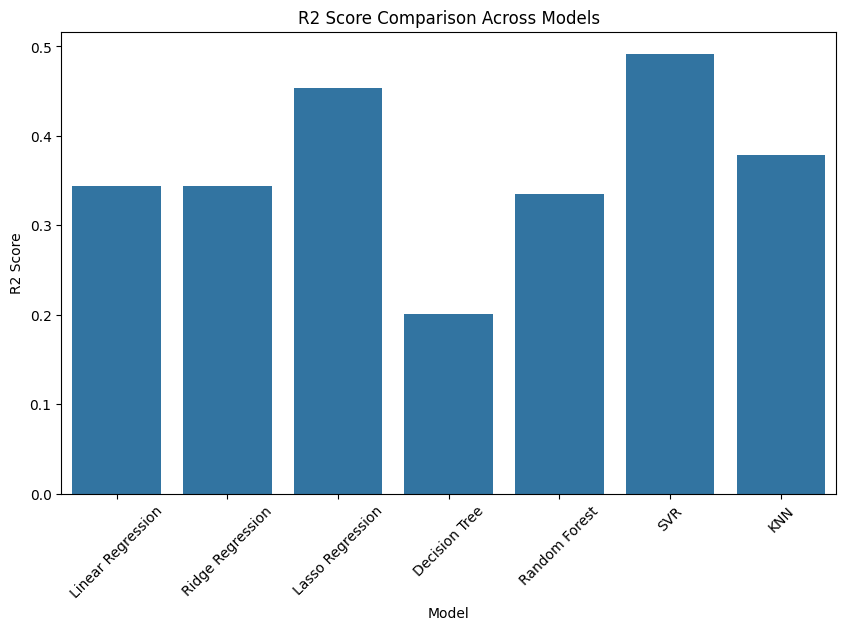

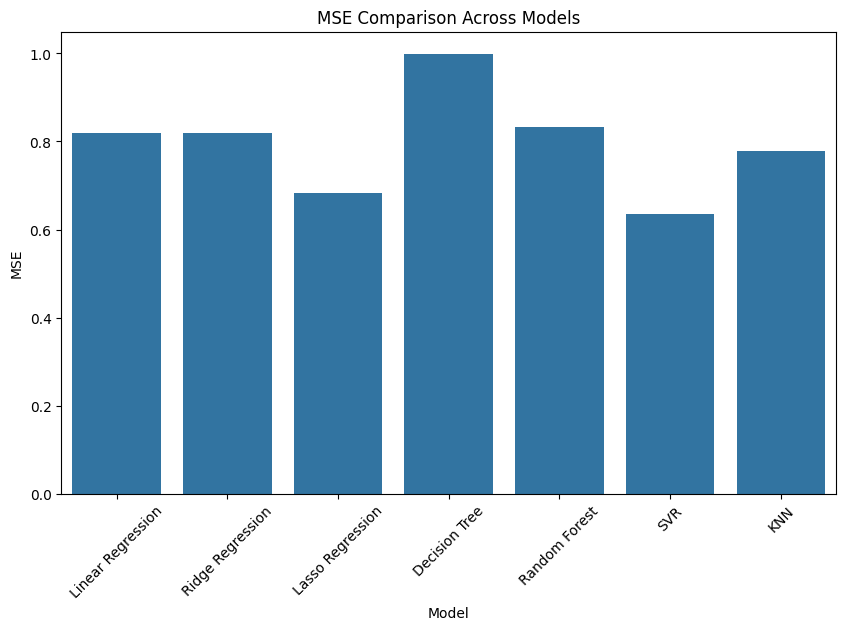

In [126]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2 Score', data=model_comparison)
plt.xticks(rotation=45)
plt.title('R2 Score Comparison Across Models')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='MSE', data=model_comparison)
plt.xticks(rotation=45)
plt.title('MSE Comparison Across Models')
plt.show()

As the MSE of SVR is the lowest, we can use SVR to predict the target variable.

In [ ]:
coefficients = pd.DataFrame({
  'Feature': X.columns,
  'Coefficient': lr.coef_
})

# Sorting by absolute value of coefficients
coefficients['abs_coeff'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coeff', ascending=False).drop('abs_coeff', axis=1)

print(coefficients)

              Feature  Coefficient
0          total_bill     0.399417
9          total_bill     0.399417
4             day_Sat    -0.181773
3          smoker_Yes    -0.167348
6            day_Thur    -0.110318
10               size     0.092712
1                size     0.092712
8   total_bill_x_size     0.076541
12    total_bill size     0.076541
2            sex_Male     0.042880
13             size^2    -0.032060
7          time_Lunch     0.028253
5             day_Sun    -0.010841
11       total_bill^2     0.007456


Getting coeffecients of the model helps us understand the importance of each feature in predicting the target variable.

In [129]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
  'Feature': X.columns,
  'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

              Feature  Importance
0          total_bill    0.251550
9          total_bill    0.234187
12    total_bill size    0.134026
8   total_bill_x_size    0.121997
11       total_bill^2    0.115455
3          smoker_Yes    0.049066
4             day_Sat    0.023225
5             day_Sun    0.019744
2            sex_Male    0.013565
7          time_Lunch    0.009921
6            day_Thur    0.009736
13             size^2    0.008869
10               size    0.004454
1                size    0.004205


### Insights for Management

1. **Total Bill Amount** is the most influential factor across all models, highlighting that larger bills are strongly associated with higher tips.  
   **Recommended Strategy**: Focus on upselling or promoting higher-value items to increase bill sizes.

2. **Dining Party Size** positively correlates with tip amounts.  
   **Recommended Strategy**: Implement tailored services or design promotions and events that cater specifically to groups.

3. **Time and Day** have high impact and show significant temporal variation in tip behavior.  
   **Recommended Strategy**: Prioritize getting greater number of working labour on weekends.

As the dataset is small, we see variations in the results of the models everytime we re-run the code.<br>
It would be better to use this analysis as a starting point and further refine the model by adding more data and features.